Importamos modulos y archivos necesarios

In [ ]:
import matplotlib.pyplot as plt
import cv2
from scipy import signal

!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/barbara.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/disk.txt
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/unsharp.txt

--2020-08-29 18:16:49--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/barbara.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121838 (119K) [image/jpeg]
Saving to: ‘barbara.jpg.1’

barbara.jpg.1       100%[===================>] 118.98K  --.-KB/s    in 0.03s   

2020-08-29 18:16:50 (3.68 MB/s) - ‘barbara.jpg.1’ saved [121838/121838]

--2020-08-29 18:16:50--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/disk.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response...

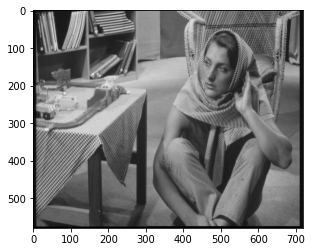

In [ ]:
img = cv2.imread('barbara.jpg') 
plt.imshow(img)

In [ ]:
def read_filter_coeff_matrix(filename):
    import numpy as np
    f = open(filename, "r")
    disk = []
    arr = []
    for i,x in enumerate(f):
        if i == 0:
            m,n = [int(el) for el in x.split(" ")]
            disk = np.zeros((m,n))
        else:
            arr.append(float(x))
        
    for i in range(m):
        for j in range(n):
            disk[i][j] = arr[i*m+j]
    return disk

In [ ]:
disk = read_filter_coeff_matrix('disk.txt')
unsharp = read_filter_coeff_matrix('unsharp.txt')

# Example 1

Pasamos la imagen por un pasabajos, deben quedar los cambios suaves.
Vemos que hay un patron en el mantel de la mesa que practicamente desaparece.

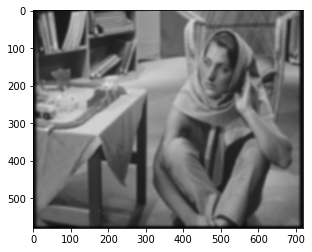

In [ ]:
h = disk.copy()
dst = cv2.filter2D(img.copy(),-1,h)
plt.imshow(dst,cmap='gray') 

Pasamos la imagen un pasa altos, deben realzarse los cambios bruscos.
Se realzan por ejemplo, los patrones de la mesa pantalon y del pañuelo. 

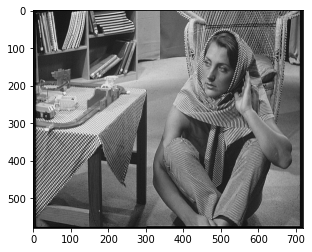

In [ ]:
h = unsharp.copy()
dst = cv2.filter2D(img,-1,h)
plt.imshow(dst,cmap='gray') 